**Proyek Akhir : Klasifikasi Gambar**

*   Nama : Zullinira Dwi Utami
*   Email : zullinira23@gmail.com
*   Alamat : Kabupaten Padang Pariaman, Sumatera Barat












**Import Package **

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Download dataset

Ekstrak Zip File

In [5]:
import zipfile
import os

In [6]:
local_zip ='/content/drive/MyDrive/FGA - Pemula ML/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content')
zip_ref.close()

Membuat direktori untuk data train dan data validasi

In [7]:
base_dir = '/content/rockpaperscissors'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'val')

In [8]:
os.mkdir(train_dir)

In [9]:
os.mkdir(validation_dir)

cek direktori 

In [11]:
os.listdir('/content/rockpaperscissors')

['rock',
 'scissors',
 'README_rpc-cv-images.txt',
 'train',
 'paper',
 'rps-cv-images',
 'val']

Membagi direktori train dan val

In [12]:
rock_dir = os.path.join(base_dir, 'rock')
paper_dir = os.path.join(base_dir, 'paper')
scissors_dir = os.path.join(base_dir, 'scissors')

Bagi direktori pada train dan validasi masing2 dengan rock, paper, scissors

In [13]:
train_rock_dir = os.path.join(train_dir,'rock')
validation_rock_dir = os.path.join(validation_dir,'rock')

train_paper_dir = os.path.join(train_dir,'paper')
validation_paper_dir = os.path.join(validation_dir,'paper')

train_scissors_dir = os.path.join(train_dir,'scissors')
validation_scissors_dir = os.path.join(validation_dir,'scissors')

In [14]:
os.mkdir(train_rock_dir)
os.mkdir(validation_rock_dir)

os.mkdir(train_paper_dir)
os.mkdir(validation_paper_dir)

os.mkdir(train_scissors_dir)
os.mkdir(validation_scissors_dir)

cek jumlah data(gambar) yang dimiliki pada masing - masing folder

In [15]:
#jumlah rock
print("jumlah gambar rock :", len(os.listdir('/content/rockpaperscissors/rock')))

#jumlah paper
print("jumlah gambar paper :", len(os.listdir('/content/rockpaperscissors/paper')))

#jumlah scissors
print("jumlah gambar scissors :", len(os.listdir('/content/rockpaperscissors/scissors')))

jumlah gambar rock : 726
jumlah gambar paper : 712
jumlah gambar scissors : 750


split data (validasi dan training) pada masing-masing kategori

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
train_rock, validation_rock = train_test_split(os.listdir(rock_dir), test_size=0.4)
train_paper, validation_paper = train_test_split(os.listdir(paper_dir), test_size=0.4)
train_scissors, validation_scissors = train_test_split(os.listdir(scissors_dir), test_size=0.4)

Mengcopy data dan membagi berdasarkan kategori

In [18]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import shutil

In [19]:
for i in train_rock:
  shutil.copy(os.path.join(rock_dir,i), os.path.join(train_rock_dir,i))
for i in train_paper:
  shutil.copy(os.path.join(paper_dir,i), os.path.join(train_paper_dir,i))
for i in train_scissors:
   shutil.copy(os.path.join(scissors_dir,i), os.path.join(train_scissors_dir,i))

In [20]:
for i in validation_rock:
  shutil.copy(os.path.join(rock_dir,i), os.path.join(validation_rock_dir,i))
for i in validation_paper:
  shutil.copy(os.path.join(paper_dir,i), os.path.join(validation_paper_dir,i))
for i in validation_scissors:
   shutil.copy(os.path.join(scissors_dir,i), os.path.join(validation_scissors_dir,i))

cek jumlah data di train dan val

In [21]:
print(' jumlah data rock di train=', len(os.listdir('/content/rockpaperscissors/train/rock')))
print(' jumlah data rock di validasi=', len(os.listdir('/content/rockpaperscissors/val/rock')))

 jumlah data rock di train= 435
 jumlah data rock di validasi= 291


In [22]:
print(' jumlah data paper di train=', len(os.listdir('/content/rockpaperscissors/train/paper')))
print(' jumlah data paper di validasi=', len(os.listdir('/content/rockpaperscissors/val/paper')))

 jumlah data paper di train= 427
 jumlah data paper di validasi= 285


In [23]:
print(' jumlah data scissors di train=', len(os.listdir('/content/rockpaperscissors/train/scissors')))
print(' jumlah data scissors di validasi=', len(os.listdir('/content/rockpaperscissors/val/scissors')))

 jumlah data scissors di train= 450
 jumlah data scissors di validasi= 300


Augumentasi dan Image Data Generator

In [24]:
#menerapkan augmentasi data generator
data_train_generator = ImageDataGenerator(rescale=1./255,
                                          rotation_range=23,
                                          horizontal_flip=True,
                                          shear_range=0.2,
                                          fill_mode="nearest"
                                          )
data_val_generator = ImageDataGenerator(rescale=1./255,
                                          rotation_range=23,
                                          horizontal_flip=True,
                                          shear_range=0.2,
                                          fill_mode="nearest"
                                          )


In [25]:
train_generator = data_train_generator.flow_from_directory(train_dir,
                                                           target_size = (150,150),
                                                           batch_size = 32,
                                                           class_mode="categorical")

val_generator = data_val_generator.flow_from_directory(validation_dir,
                                                       target_size=(150,150),
                                                       batch_size = 32,
                                                       class_mode="categorical")

Found 1312 images belonging to 3 classes.
Found 876 images belonging to 3 classes.


Model Sequential

In [26]:
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.models import Sequential
from keras.optimizers import Adam
import tensorflow as tf
from keras.layers import Flatten, Conv2D, MaxPool2D

In [27]:
#buat jaringan syaraf tiruan model CNN
model = Sequential()

model.add(Conv2D(32, (3,3), activation="relu", input_shape=(150, 150, 3)))
model.add(MaxPool2D(2,2))

model.add(Conv2D(64, (3,3), activation="relu"))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.2))

model.add(Conv2D(128, (3,3), activation="relu"))
model.add(MaxPool2D(2,2))

model.add(Conv2D(128, (3,3), activation="relu"))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.2))

model.add(Flatten())

#buat hiden layer
model.add(Dense(512, activation="relu"))

# Layer output
model.add(Dense(3, activation="softmax"))

opt = Adam(lr=.001)
 
# Compile CNN dengan nilai opt, loss, dan matrics
model.compile(optimizer = opt, loss = "categorical_crossentropy", metrics=["accuracy"])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [28]:
history = model.fit(train_generator,
                    steps_per_epoch =25,
                    epochs = 20,
                    validation_data = val_generator,
                    validation_steps = 4,
                    verbose = 2)

Epoch 1/20
25/25 - 42s - loss: 1.1142 - accuracy: 0.3988 - val_loss: 1.0118 - val_accuracy: 0.4141
Epoch 2/20
25/25 - 40s - loss: 0.8859 - accuracy: 0.6250 - val_loss: 0.8906 - val_accuracy: 0.6484
Epoch 3/20
25/25 - 41s - loss: 0.5075 - accuracy: 0.8363 - val_loss: 0.4357 - val_accuracy: 0.8438
Epoch 4/20
25/25 - 40s - loss: 0.2863 - accuracy: 0.9038 - val_loss: 0.2590 - val_accuracy: 0.9141
Epoch 5/20
25/25 - 41s - loss: 0.2498 - accuracy: 0.9100 - val_loss: 0.2286 - val_accuracy: 0.9297
Epoch 6/20
25/25 - 40s - loss: 0.2882 - accuracy: 0.9000 - val_loss: 0.2809 - val_accuracy: 0.9062
Epoch 7/20
25/25 - 40s - loss: 0.2146 - accuracy: 0.9212 - val_loss: 0.1994 - val_accuracy: 0.9219
Epoch 8/20
25/25 - 40s - loss: 0.2235 - accuracy: 0.9250 - val_loss: 0.1447 - val_accuracy: 0.9688
Epoch 9/20
25/25 - 40s - loss: 0.1707 - accuracy: 0.9425 - val_loss: 0.1717 - val_accuracy: 0.9453
Epoch 10/20
25/25 - 40s - loss: 0.1694 - accuracy: 0.9463 - val_loss: 0.1615 - val_accuracy: 0.9453
Epoch 11/

**Upload File**

In [29]:
from google.colab import files
from keras.preprocessing import image
import matplotlib.image as mpimg
%matplotlib inline

In [30]:
uploaded = files.upload()


Saving 1MMkSW3f1CAsw03q.png to 1MMkSW3f1CAsw03q.png


[[0. 1. 0.]]
0bioBZYFCXqJIulm.png
rock


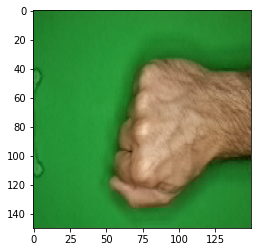

In [ ]:
for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
 
  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)

  print(classes)
  print(fn)
  
  if classes[0][0] == 1:
    print('paper')
  elif classes[0][1] == 1:
    print('rock')
  elif classes[0][2] == 1:
    print('scissors')

Saving 89956fba-e484-41cb-90ab-af53ff22ae8f.jpg to 89956fba-e484-41cb-90ab-af53ff22ae8f (1).jpg
[[1. 0. 0.]]
paper


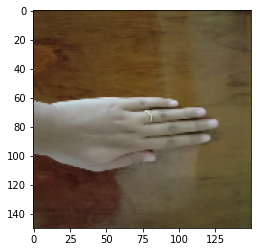

In [32]:
uploaded = files.upload()

for folder in uploaded.keys():
  path = folder
  img = image.load_img(path, target_size=(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
 
  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)

  print(classes)
  #print(fn)
  
  if classes[0][0] == 1:
    print('paper')
  elif classes[0][1] == 1:
    print('rock')
  elif classes[0][2] == 1:
    print('scissors')

Saving Xu49k2rxvWRflm2W.png to Xu49k2rxvWRflm2W.png
[[0. 0. 1.]]
scissors


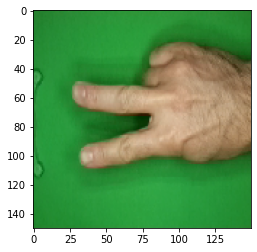

In [42]:
uploaded = files.upload()

for folder in uploaded.keys():
  path = folder
  img = image.load_img(path, target_size=(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
 
  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)

  print(classes)
  #print(fn)
  
  if classes[0][0] == 1:
    print('paper')
  elif classes[0][1] == 1:
    print('rock')
  elif classes[0][2] == 1:
    print('scissors')